# Lab: PageRank

In this assignment, we will learn how to compute the importance score of nodes in a graph by using the PageRank method.

## Generate a graph

Here, we use [NetworkX](https://networkx.org/) to generate a directed graph. Then, we will apply PageRank method to this graph. 

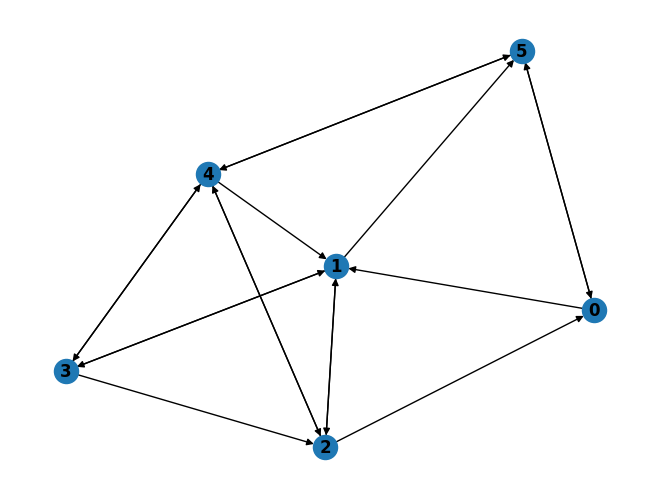

#nodes: 6, #edges: 17
node-0, #in_degrees 2, #out_degrees 2
node-1, #in_degrees 4, #out_degrees 3
node-2, #in_degrees 3, #out_degrees 3
node-3, #in_degrees 2, #out_degrees 3
node-4, #in_degrees 3, #out_degrees 4
node-5, #in_degrees 3, #out_degrees 2
[[0 1 0 0 0 1]
 [0 0 1 1 0 1]
 [1 1 0 0 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [1 0 0 0 1 0]]


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# generate a directed graph from the given adjacency matrix
A = np.array([[0, 1, 0, 0, 0, 1],
             [0, 0, 1, 1, 0, 1],
             [1, 1, 0, 0, 1, 0],
             [0, 1, 1, 0, 1, 0],
             [0, 1, 1, 1, 0, 1],
             [1, 0, 0, 0, 1, 0]])

G = nx.from_numpy_array(A, create_using=nx.DiGraph)

nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

print('#nodes: {}, #edges: {}'.format(G.number_of_nodes(), G.number_of_edges()))

# output the in_degrees and out_degrees of each node
for idx in range(G.number_of_nodes()):
    print('node-{}, #in_degrees {}, #out_degrees {}'.format(idx, G.in_degree(idx), G.out_degree(idx)))

# get the adjacency matrix of graph G
Adj = nx.adjacency_matrix(G).todense()
print(Adj)

## Task 1. Build the transition matrix from the adjacency matrix

In [2]:
M = A/A.sum(axis=0) # axis = 0 => row sum which is the out degree

In [3]:
M

array([[0.        , 0.25      , 0.        , 0.        , 0.        ,
        0.33333333],
       [0.        , 0.        , 0.33333333, 0.5       , 0.        ,
        0.33333333],
       [0.5       , 0.25      , 0.        , 0.        , 0.33333333,
        0.        ],
       [0.        , 0.25      , 0.33333333, 0.        , 0.33333333,
        0.        ],
       [0.        , 0.25      , 0.33333333, 0.5       , 0.        ,
        0.33333333],
       [0.5       , 0.        , 0.        , 0.        , 0.33333333,
        0.        ]])

## Task 2. Use the power iteration method to compute the importance score of nodes


* Initialization: initialize the importance score vector $r_{0}=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]$.
* Iterate: $r_{t+1} =  M r_{t}$
* Stop when $\|r_{t+1} - r_{t}\|_1\leq \epsilon$


In [4]:
EPS = 0.001
r = np.ones((6, 1)) * (1.0/6)

while True:
    r_next = np.matmul(M, r)
    if np.linalg.norm(r_next - r, 1) <= EPS:
        break
    r = r_next

In [5]:
print(r)
print(f'\nSum of Final Vector r={np.sum(r)}')

[[0.08904986]
 [0.19116698]
 [0.17199538]
 [0.18462542]
 [0.23885992]
 [0.12430244]]

Sum of Final Vector r=1.0


In [6]:
sorted_importance = np.argsort(r, axis=None)[::-1]

print(f'{"Importance Ranking": <16} {"Node": <16}')
for i, node in enumerate(sorted_importance):
    print(f'{i+1: <16} {node: <16}')  

Importance Ranking Node            
1                4               
2                1               
3                3               
4                2               
5                5               
6                0               
